# Building Linear Regression From Scratch
equation source: https://towardsdatascience.com/optimization-of-supervised-learning-loss-function-under-the-hood-df1791391c82

Math Fomula
- Prediction Function (hypothesis $h_\theta(x^{(i)}) $):
$$h_\theta(x^{(i)}) = {\theta_0}{x_0} + {\theta_1}{x_1} + ... + {\theta_j}{x_j}$$
where  
        $x_{0}=1$  
        $i =$ the number of data  
        $j =$ the number of features  
        $x^{i}_{j}=$ $i^{th}$ data of $j^{th}$ feature   
  
- Least Square Error:  
$$\frac{1}{2}(h_{\theta}(x^{(i)}) - y^{(i)})^2$$

- Cost Function: Sum of the Least Square Error of all data 
$$J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})^2$$
where  
        $m=$ number of data

- Derivative of the cost function at $\theta_j$  
$$\frac{\partial {J(\theta)}}{\partial {\theta_j}} = \frac{1}{m} \sum_{i=1}^{m}{(h_{\theta}(x^{(i)}) - y^{(i)}) x^{(i)}_{j}}$$

$$\theta^{'}_{0} = \theta_{0} - \alpha \frac{1}{m} \sum_{i=1}^{m}{(h_{\theta}(x^{(i)}) - y^{(i)})x^{(i)}_{0}}\\ 
\theta^{'}_{1} = \theta_{1} - \alpha \frac{1}{m} \sum_{i=1}^{m}{(h_{\theta}(x^{(i)}) - y^{(i)})x^{(i)}_{1}}\\ 
...... \\
\theta^{'}_{j} = \theta_{j} - \alpha \frac{1}{m} \sum_{i=1}^{m}{(h_{\theta}(x^{(i)}) - y^{(i)})x^{(i)}_{j}}$$

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

In [172]:
# generate data
def regression_data(m: int, n: int, random_status: int = 1):
    """
    generate data for linear regression model
    args:
        m: number of samples
        n: number of features
    """
    np.random.seed(random_status)
    X = np.random.randint(-100, 100, size=(m, n))
    X = np.hstack((np.ones((m, 1)), X))
    
    np.random.seed(random_status)
    weights = np.random.random(size=(X.shape[1]))
    weights = np.round(weights, 3)
    y = X@weights
    
    return X[:, 1:], y, weights

X, y, true_weights = regression_data(100, 3)

# validate
print("first row of X: ", X[0, :])
print("true weights: ", true_weights)
print(np.hstack(([1], X[0, :]))@true_weights)
print(y[0])

first row of X:  [-63.  40. -28.]
true weights:  [0.417 0.72  0.    0.302]
-53.399
-53.399


In [173]:
# build linear regression class
class Linear_Regression():
    def __init__(self, 
                 learning_rate:float = 0.00001, 
                 epoch:int = 1,
                 random_status = 1):
        self.lr = learning_rate
        self.max_inter = epoch
        self.random_status = random_status
        self.loss_history= []
        
    def fit(self, X: np.ndarray, y: np.ndarray):
        # add intercept 
        X = np.hstack(
            (np.ones(shape=(X.shape[0],1)), X))
        # initialize weights
        np.random.seed(self.random_status)
        self.weights = np.random.random(X.shape[1])
        
        pred = self.predict(X, add_intercept=False)
        loss = self.loss_function(pred, y)
        self.loss_history.append(loss)
        print("-"*3, "epoch 0: initial","-"*3)
        print(f"loss: {np.round(loss,5)}")
        # update weigts
        for epoch in range(self.max_inter):
            print("-"*3, f"epoch {epoch}","-"*3)
            
            self.update_weights(X, pred, y)
            pred = self.predict(X, add_intercept=False)
            loss = self.loss_function(pred, y)
            self.loss_history.append(loss)
            print(f"loss: {np.round(loss, 5)}") 
            
    def loss_function(self, y_pred, y):
        m = y.shape[0]
        loss = 1/(2*m) * np.sum(np.power(y_pred - y, 2)) 
        return loss 

    def update_weights(self, X, y_pred, y):
        # gradients
        m = X.shape[0]
        gradients = 1/m*((y_pred - y)@X)
        self.weights = self.weights - self.lr*gradients
        

    def predict(self, X, add_intercept=True):
        if add_intercept:
            X = np.hstack((np.ones(shape=(X.shape[0], 1)), X))
        pred = X@self.weights
        return pred 


--- epoch 0: initial ---
loss: 0.00032
--- epoch 0 ---
loss: 0.00031
--- epoch 1 ---
loss: 0.00029
--- epoch 2 ---
loss: 0.00027
--- epoch 3 ---
loss: 0.00026
--- epoch 4 ---
loss: 0.00024
--- epoch 5 ---
loss: 0.00023
--- epoch 6 ---
loss: 0.00021
--- epoch 7 ---
loss: 0.0002
--- epoch 8 ---
loss: 0.00019
--- epoch 9 ---
loss: 0.00018
--- epoch 10 ---
loss: 0.00017
--- epoch 11 ---
loss: 0.00016
--- epoch 12 ---
loss: 0.00015
--- epoch 13 ---
loss: 0.00014
--- epoch 14 ---
loss: 0.00013
--- epoch 15 ---
loss: 0.00013
--- epoch 16 ---
loss: 0.00012
--- epoch 17 ---
loss: 0.00011
--- epoch 18 ---
loss: 0.00011
--- epoch 19 ---
loss: 0.0001
--- epoch 20 ---
loss: 0.0001
--- epoch 21 ---
loss: 9e-05
--- epoch 22 ---
loss: 9e-05
--- epoch 23 ---
loss: 8e-05
--- epoch 24 ---
loss: 8e-05
--- epoch 25 ---
loss: 7e-05
--- epoch 26 ---
loss: 7e-05
--- epoch 27 ---
loss: 6e-05
--- epoch 28 ---
loss: 6e-05
--- epoch 29 ---
loss: 6e-05
--- epoch 30 ---
loss: 5e-05
--- epoch 31 ---
loss: 5e-05
--- 

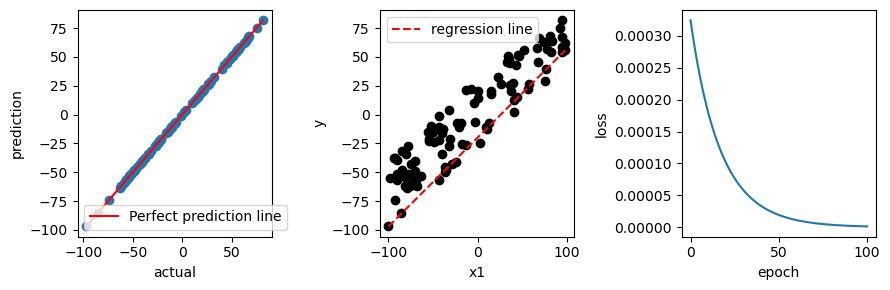

In [174]:

lr = Linear_Regression(learning_rate=0.00001, epoch=100)

lr.fit(X, y)
pred = lr.predict(X)

plt.figure(figsize=(9,3))
plt.subplot(131)
plt.scatter(y, pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 
         c='r', label='Perfect prediction line')
plt.xlabel('actual')
plt.ylabel('prediction')
plt.legend()
plt.subplot(132)
plt.scatter(X[:,0], y, c='black')
plt.plot(
    [X[:, 0].min(), X[:, 0].max()], 
    [pred[np.argmin(X[:,0])], pred[np.argmax(X[:,0])]], 
    c='r', linestyle='--', label='regression line')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()

plt.subplot(133)
plt.plot(lr.loss_history)
plt.xlabel('epoch')
plt.ylabel('loss')

plt.tight_layout()
plt.show()

In [178]:
print('actual weights:\n', true_weights)
print('predicted weights:\n', np.round(lr.weights, 4))

actual weights:
 [0.417 0.72  0.    0.302]
predicted weights:
 [0.417 0.72  0.    0.302]


# Comparing with sklearn results 

In [176]:
from sklearn.linear_model import LinearRegression
sk_lr = LinearRegression()
sk_lr.fit(X, y)
sk_pred = sk_lr.predict(X)

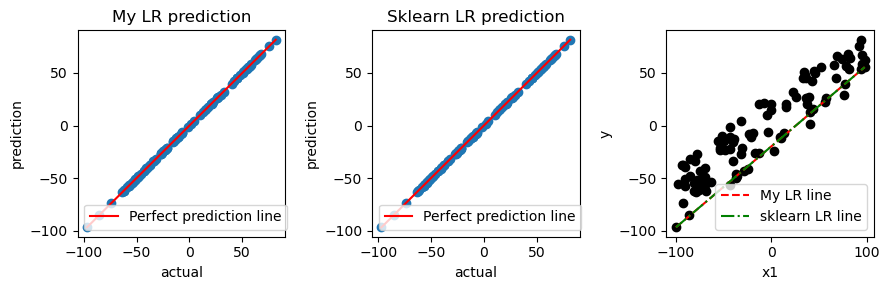

In [177]:
plt.figure(figsize=(9,3))
plt.subplot(131)
plt.scatter(y, pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 
         c='r', label='Perfect prediction line')
plt.xlabel('actual')
plt.ylabel('prediction')
plt.title('My LR prediction')
plt.legend()

plt.subplot(132)
plt.scatter(y, sk_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 
         c='r', label='Perfect prediction line')
plt.xlabel('actual')
plt.ylabel('prediction')
plt.title('Sklearn LR prediction')
plt.legend()

plt.subplot(133)
plt.scatter(X[:,0], y, c='black')
plt.plot(
    [X[:, 0].min(), X[:, 0].max()], 
    [pred[np.argmin(X[:,0])], pred[np.argmax(X[:,0])]], 
    c='r', linestyle='--', label='My LR line')
plt.plot(
    [X[:, 0].min(), X[:, 0].max()], 
    [sk_pred[np.argmin(X[:,0])], sk_pred[np.argmax(X[:,0])]], 
    c='g', linestyle='-.', label='sklearn LR line')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()